In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [36]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [37]:
y.index = y.name

In [38]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [39]:
y.index = pd.to_datetime(y.index)

In [40]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [41]:
from pytrends.request import TrendReq

In [42]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Interest Rates", "Huawei", "iPhone improvements", "Government regulations", "iPhone price",
            "UCLA", "Kpop", "Machine learning"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [43]:
df = df.resample("Q").mean()

In [44]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [48]:
X_scaled = scaler.fit_transform(X)

In [67]:
y_scaled = scaler.fit_transform(y)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [50]:
from sklearn.linear_model import Lasso

In [68]:
lasso = Lasso(alpha = .5).fit(X_scaled,y_scaled)

In [69]:
coefficients = lasso.coef_

In [60]:
import matplotlib.pyplot as plt

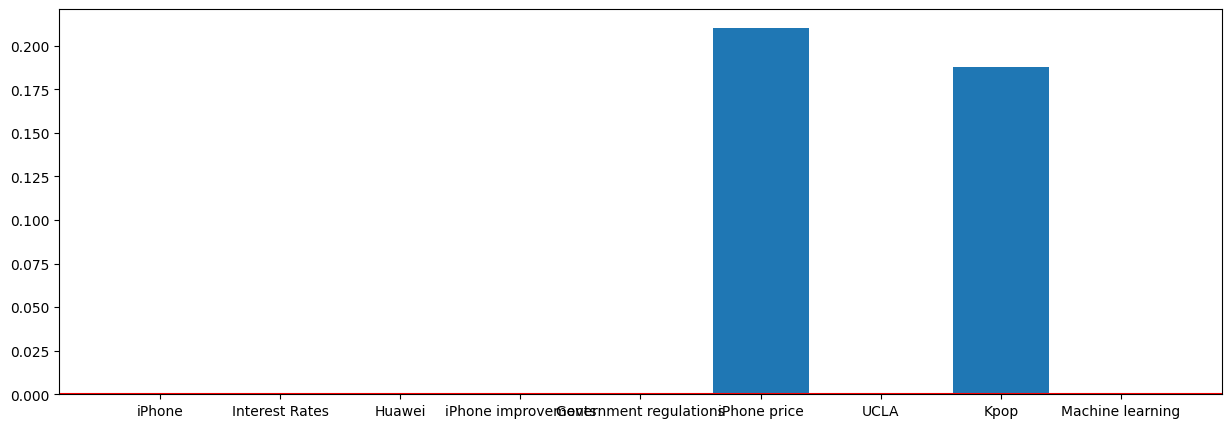

In [81]:
plt.figure(figsize = (15,5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

I think that the Lasso result does not make that much sense. The result shows that iphone price and Kpop have positive relationships with BasicEPS, and other predictors are not so good to predict BasicEPS. However, in my opinion, Kpop should be unable to predict Apple's earning. Also, lambda we chose perhaps is too large for the normalized data, and penalty is so heavy that most of coefficients have been shrinked to 0.